<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Langgraph_Indetail_Sunny_Yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install langgraph

In [26]:
def function1(input1):
  return input1+"from first function"
def function2(input2):
  return input2+" and from second function"

In [27]:
from langgraph.graph import Graph
workflow1=Graph()
workflow1.add_node("function1",function1)
workflow1.add_node("function2",function2)
workflow1.add_edge("function1","function2")

In [28]:
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")

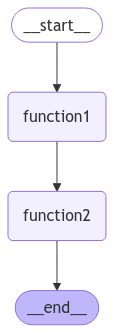

In [29]:
workflow1.compile()

In [30]:
app1=workflow1.compile()

In [31]:
app1.invoke("Hi ")

'Hi from first function and from second function'

In [32]:
input="Hi!"

In [33]:
for output in app1.stream(input):
  for key, value in output.items():
    print(f"here is output from {key}")
    print("-------")
    print(value)
    print("\n")

here is output from function1
-------
Hi!from first function


here is output from function2
-------
Hi!from first function and from second function




In [34]:
!pip install langchain_groq

In [35]:
from google.colab import userdata
import os
os.environ['GROQ_API_KEY']=userdata.get('groq_api_key')

In [36]:
from langchain_groq import ChatGroq

In [37]:
def function1(input):
  llm = ChatGroq()
  response = llm.invoke(input).content
  return response

In [38]:
def function2(input):
  upper_case = input.upper()
  return upper_case

In [39]:
workflow2=Graph()

In [40]:
workflow2.add_node('llm',function1)
workflow2.add_node('upper_case',function2)
workflow2.add_edge('llm','upper_case')

In [41]:
workflow2.set_entry_point('llm')
workflow2.set_finish_point('upper_case')

In [42]:
app2=workflow2.compile()

In [43]:
app2.invoke("Hi")

"HELLO! IT'S NICE TO MEET YOU. IS THERE SOMETHING SPECIFIC YOU WOULD LIKE TO KNOW OR TALK ABOUT? I'M HERE TO HELP WITH ANY QUESTIONS YOU HAVE TO THE BEST OF MY ABILITY. JUST LET ME KNOW HOW I CAN ASSIST YOU."

In [44]:
app2.invoke("Indian Prime Minister?")

'NARENDRA MODI IS THE CURRENT PRIME MINISTER OF INDIA, AS OF MY KNOWLEDGE UP TO 2021. HE HAS BEEN IN OFFICE SINCE MAY 2014. HOWEVER, PLEASE VERIFY FROM A RELIABLE SOURCE AS THIS INFORMATION MIGHT HAVE CHANGED.'

In [45]:
for output in app2.stream(input):
  for key, value in output.items():
    print(f"here is output from {key}")
    print("-------")
    print(value)
    print("\n")

here is output from llm
-------
Hello! It's nice to meet you. Is there something you would like to know or talk about? I'm here to help with any questions you have about writing, grammar, or punctuation. I can also provide general information or engage in a conversation on a topic of your choosing. Just let me know how I can assist you. I'm here to help!


here is output from upper_case
-------
HELLO! IT'S NICE TO MEET YOU. IS THERE SOMETHING YOU WOULD LIKE TO KNOW OR TALK ABOUT? I'M HERE TO HELP WITH ANY QUESTIONS YOU HAVE ABOUT WRITING, GRAMMAR, OR PUNCTUATION. I CAN ALSO PROVIDE GENERAL INFORMATION OR ENGAGE IN A CONVERSATION ON A TOPIC OF YOUR CHOOSING. JUST LET ME KNOW HOW I CAN ASSIST YOU. I'M HERE TO HELP!




In [46]:
def function3(input):
  token = input.split()
  token_count = len(token)
  token_number = f"Total token number is {token_count}"
  return token_number

In [47]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_count",function3)
workflow3.add_edge("llm","token_count")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_count")
app3=workflow3.compile()

In [48]:
app3.invoke("Hi")

'Total token number is 35'

In [49]:
for output in app3.stream(input):
  for key, value in output.items():
    print(f"here is output from {key}")
    print("-------")
    print(value)
    print("\n")

here is output from llm
-------
Hello! It's nice to meet you. Is there something you would like to talk about or ask me? I'm here to help with any questions you have to the best of my ability.


here is output from token_count
-------
Total token number is 33




Adding RAG to Langgraph

In [50]:
!pip install langchain_community
!pip install chromadb
!pip install langchain langchain_google_genai

In [51]:
os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')

In [52]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")


In [53]:
loader = DirectoryLoader('../content', glob='./*.txt',loader_cls=TextLoader)
documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=50)
texts = text_splitter.split_documents(documents)
doc_strings = [text.page_content for text in texts]
print(doc_strings)

['Long Context Models (LCMs) are advanced artificial intelligence systems designed to handle and', 'intelligence systems designed to handle and process large amounts of sequential data efficiently.', 'large amounts of sequential data efficiently. These models excel in scenarios where understanding', 'models excel in scenarios where understanding and generating context over extensive sequences of', 'generating context over extensive sequences of text, audio, or other data types is crucial. Below', 'audio, or other data types is crucial. Below is an exploration of their key aspects and', 'Below is an exploration of their key aspects and significance:', '1. **Definition**: Long Context Models refer to AI architectures that focus on maintaining', 'to AI architectures that focus on maintaining coherence and relevancy over long sequences of input', 'and relevancy over long sequences of input data. They are particularly effective in natural', 'data. They are particularly effective in natural 

In [55]:
from langchain.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [56]:
db = Chroma.from_documents(texts, embeddings)
retriever = db.as_retriever(search_kwargs={"k":3})

In [57]:
query="what is Long Context Model?"
docs=retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)
for doc in docs:
  print(doc.metadata)
  print(doc.page_content)

{'source': '../content/temp.txt'}
1. **Definition**: Long Context Models refer to AI architectures that focus on maintaining
{'source': '../content/temp.txt'}
1. **Definition**: Long Context Models refer to AI architectures that focus on maintaining
{'source': '../content/temp.txt'}
Long Context Models (LCMs) are advanced artificial intelligence systems designed to handle and
{'source': '../content/temp.txt'}
In conclusion, Long Context Models are revolutionizing the way AI systems handle extensive and


In [58]:
def function1(AgentState):
  message = AgentState["messages"]
  question=message[-1]
  complete_prompt="Your task is to provide only the brief answer based on user query.Don't include too much reasoning. Following is the user query: "+question
  llm=ChatGroq()
  response = llm.invoke(complete_prompt)
  AgentState["messages"].append(response.content)
  return AgentState

In [59]:
AgentState={}
AgentState["messages"]=[]

In [60]:
def function2(AgentState):
    messages = AgentState["messages"]
    question = messages[0]
    llm = ChatGroq()
    template = """
    Answer the question based on only the following context:
    {context}
    Question:
    {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
    )

    # Debug the retrieval chain result
    retrieval_result = retrieval_chain.invoke(AgentState)
    print("DEBUG: retrieval_chain result:", type(retrieval_result), retrieval_result)

    # Ensure retrieval result is a string before appending
    if isinstance(retrieval_result, str):
        AgentState["messages"].append(retrieval_result)
    else:
        print("DEBUG: Non-string result from retrieval_chain, converting to string.")
        AgentState["messages"].append(str(retrieval_result))

    return AgentState


In [61]:
workflow4 = Graph()
workflow4.add_node("LLM", function1)
workflow4.add_node("RAGtool", function2)
workflow4.add_edge("LLM", "RAGtool")
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

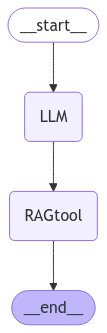

In [62]:
workflow4.compile()

In [63]:
inputs={"messages":["Tell me about Large Context Models?"]}

In [66]:
for output in app4.stream(inputs):
  for key, value in output.items():
    print(f"here is output from {key}")
    print("-------")
    print(value)
    print("\n")

here is output from LLM
-------
{'messages': ['Tell me about Large Context Models?', 'Large context models, also known as long-context models, are language models that can consider a larger portion of text when generating or understanding language. They are designed to handle longer sequences of text, improving their ability to understand complex or nuanced information. These models can be particularly useful in tasks such as summarization, translation, and text generation.', 'Yes, large context models, also known as long-context models, are language models that can process a larger portion of text, improving their ability to understand complex or nuanced information. They are useful in tasks such as summarization, translation, and text generation.']}




AttributeError: 'dict' object has no attribute 'replace'

RAG OR LLM

In [67]:
from google.colab import userdata
import os
os.environ['GOOGLE_API_KEY']=userdata.get('GOOGLE_API_KEY')

In [68]:
from langchain_community.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain.prompts import PromptTemplate, ChatPromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")


In [69]:
loader = WebBaseLoader("https://blog.langchain.dev/langgraph-studio-the-first-agent-ide/")
documents=loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=50)
texts = text_splitter.split_documents(documents)
doc_strings = [text.page_content for text in texts]
print(doc_strings)

['LangGraph Studio: The first agent IDE', 'Skip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCase Studies', 'Skip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCase Studies\n\n\n\n\nIn the Loop\n\n\n\n\nLangChain\n\n\n\n\nDocs\n\n\n\n\nChangelog', 'LangChain\n\n\n\n\nDocs\n\n\n\n\nChangelog\n\n\n\n\n\nSign in\nSubscribe', 'LangGraph Studio: The first agent IDE', 'LangGraph Studio provides a specialized agent IDE for visualizing, interacting with, and debugging', 'for visualizing, interacting with, and debugging complex agentic applications. See how to use it on', 'agentic applications. See how to use it on your desktop today.', '4 min read\nAug 1, 2024', 'LLMs have paved the way for the development of new types of agentic applications ‚Äî and as LLM', 'new types of agentic applications ‚Äî and as LLM applications evolve, so must the tooling needed to', "evolve, so must the tooling needed to efficiently develop them. Today, we're announcing LangGraph", "develop them. Today, we're announcin

In [70]:
from langchain.embeddings import HuggingFaceEmbeddings

In [71]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

In [72]:
db = Chroma.from_documents(texts, embeddings)
retriever = db.as_retriever(search_kwargs={"k":3})

In [73]:
query="what is Langgraph"
docs=retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)
for doc in docs:
  print(doc.metadata)
  print(doc.page_content)

{'description': 'LangGraph Studio provides a specialized agent IDE for visualizing, interacting with, and debugging complex agentic applications. See how to use it on your desktop today.', 'language': 'en', 'source': 'https://blog.langchain.dev/langgraph-studio-the-first-agent-ide/', 'title': 'LangGraph Studio: The first agent IDE'}
tailored for LangGraph applications. LangGraph Studio facilitates this by making it easy to
{'description': 'LangGraph Studio provides a specialized agent IDE for visualizing, interacting with, and debugging complex agentic applications. See how to use it on your desktop today.', 'language': 'en', 'source': 'https://blog.langchain.dev/langgraph-studio-the-first-agent-ide/', 'title': 'LangGraph Studio: The first agent IDE'}
tailored for LangGraph applications. LangGraph Studio facilitates this by making it easy to
{'description': 'LangGraph Studio provides a specialized agent IDE for visualizing, interacting with, and debugging complex agentic applications. 

In [74]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [75]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [76]:
from pydantic import BaseModel, Field
class TopicSelectionParser(BaseModel):
  Topic : str = Field(description="The selected topic")
  Reasoning: str = Field(description="Reasoning behind the topic selection")

In [77]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [79]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "The selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [94]:
def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    llm=ChatGroq()
    template="""
    Your task is to classify the given user query into one of the following categories: [Langgraph, Not Related].
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser

    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [95]:
template="""
    Your task is to classify the given user query into one of the following categories: [Langgraph, Not Related].
    Only respond with the category name and nothing else.

    User query: "Tell me about Langgraph"
    The output should be formatted as a JSON instance that conforms to the JSON schema below.

    As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
    the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

    Here is the output schema:
    ```
    {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
        """

In [96]:
state={"messages": ["Tell me about Langgraph"]}

In [97]:
function_1(state)

Tell me about Langgraph
Topic='Langgraph' Reasoning='The user query explicitly asks for information about Langgraph'


{'messages': ['Langgraph']}

In [98]:
def router(state):
  print('->Router->')
  message=state["messages"]
  last_message=message[-1]
  print(last_message)
  if 'Langgraph' in last_message:
    return 'RAG Call'
  else:
    return 'LLM Call'


In [108]:
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)
    llm=ChatGroq()
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [109]:
def function_3(state):
    print('-> Calling LLM ->')
    llm=ChatGroq()
    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [110]:
from langgraph.graph import StateGraph,END

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

workflow5.add_conditional_edges(
    "agent",


    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

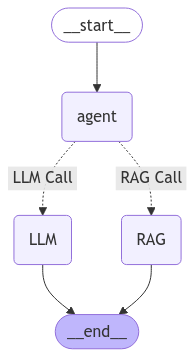

In [111]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [117]:
inputs = {"messages": ["Tell me about India"]}
output = app5.invoke(inputs)

Tell me about India
Topic='Not Related' Reasoning="The user query 'Tell me about India' is not related to Langgraph as it is a general request for information about a country, not a language or graph-related query."
->Router->
Not Related
-> Calling LLM ->


In [118]:
output

{'messages': ['Tell me about India',
  'Not Related',
  "India, officially known as the Republic of India, is a country located in South Asia. It is the seventh-largest country by land area, the second-most populous country, and the most populous democracy in the world. Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west; China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east.\n\nIndia has a rich and diverse history, with one of the world's oldest civilizations, the Indus Valley civilization, dating back to 2500 BCE. It has been a major hub of trade and migration over centuries, contributing to its rich cultural and linguistic diversity. Today, India is a federal parliamentary democratic republic, with a President as the head of state and a Prime Minister as the head of government.\n\nIndia's economy is the world's fifth-largest by nominal GDP and is c

In [119]:
inputs = {"messages": ["Tell me about Langgraph"]}
output = app5.invoke(inputs)

Tell me about Langgraph
Topic='Langgraph' Reasoning='The user query directly asks for information about Langgraph'
->Router->
Langgraph
-> Calling RAG ->
Tell me about Langgraph
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [120]:
output

{'messages': ['Tell me about Langgraph',
  'Langgraph',
  'LangGraph Studio is a specialized Integrated Development Environment (IDE) designed for visualizing, interacting with, and debugging complex agentic applications. It is tailored for use with LangGraph applications and provides an easy-to-use interface to facilitate this. You can learn how to use LangGraph Studio on your desktop today by visiting the source provided in the metadata.']}